In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv("E:\GroundTruth.csv")
df1.head(100)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,ISIC_0024401,0.0,1.0,0.0,0.0,0.0,0.0,0.0
96,ISIC_0024402,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,ISIC_0024403,0.0,0.0,1.0,0.0,0.0,0.0,0.0
98,ISIC_0024404,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
path="E:\images"
names=[]
data=[]
for file in os.listdir(path):    
    f = os.path.join(path, file)
    names.append(file)
    image = cv2.imread(f, 0)   
    blur = cv2.GaussianBlur(image, (5,5), 0)
    _, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    th3=cv2.resize(th3,(80,80))
    data.append(th3)

In [4]:
data

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 191, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [5]:
flat_data=[]
for i in range(len(data)):
    flat_data.append(np.array(data[i].flatten()))

In [6]:
len(flat_data[0])

6400

In [7]:
flat_data

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 191, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ...,   0,   0,   0], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([  0,   0,   0, ..., 255, 255, 255], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=

In [8]:
m1=1000000
m2=-100000
m3=10000000
m4=-10000000
for i in range(len(flat_data)):
    temp=pd.Series(flat_data[i])
    m1=min(m1,min(temp.unique()))
    m2=max(m2,max(temp.unique()))
    flat_data[i]=flat_data[i]/255
    temp=pd.Series(flat_data[i])
    m3=min(m3,min(temp.unique()))
    m4=max(m4,max(temp.unique()))
    
    
print(m1,m2)
print(m3,m4)

0 255
0.0 1.0


In [9]:
df=pd.DataFrame(flat_data)
df

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.74902,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00000,0.0
10011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0
10012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0
10013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [10]:
df_y=df1.iloc[:,1:]
df_y

,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10010,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10011,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10012,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y=[]
df_y=df1.iloc[:,1:]

for i in range(10015):
    y.append(np.array(df_y.iloc[i,:]))
y=np.array(y)
y=np.argmax(y, axis=1)
y

array([1, 1, 1, ..., 4, 1, 1], dtype=int64)

In [12]:
new_df=pd.concat([df,pd.Series(y,name="target")],axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.74902,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00000,0.0,0
10011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,0
10012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,4
10013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1


In [13]:
new_df.to_csv("E:\df_v3.csv")

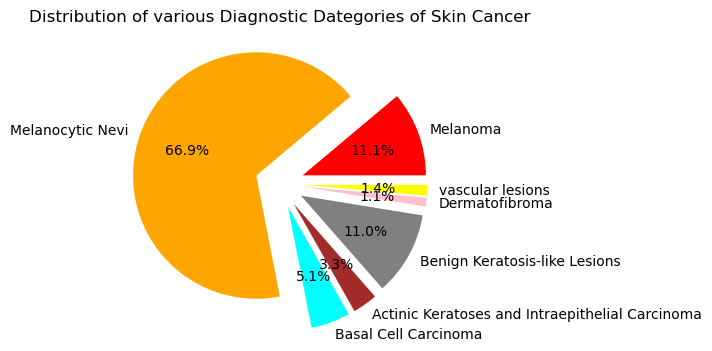

In [15]:
names = ['Melanoma', 'Melanocytic Nevi', 'Basal Cell Carcinoma',
        'Actinic Keratoses and Intraepithelial Carcinoma', 'Benign Keratosis-like Lesions', 'Dermatofibroma',"vascular lesions"]
data = [1113, 6705, 514, 327, 1099, 115,142]
colors = ( "red","orange", "cyan", "brown",
          "grey", "pink", "yellow")

fig = plt.figure(figsize =(4, 4))
plt.pie(data, labels = names,colors=colors,autopct='%1.1f%%',explode = [0.2, 0.2, 0.2,0.2,.2,.2,.2]  )
plt.title("Distribution of various Diagnostic Dategories of Skin Cancer")
plt.show()

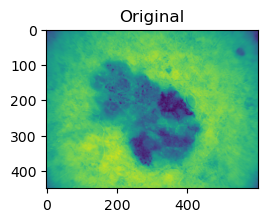

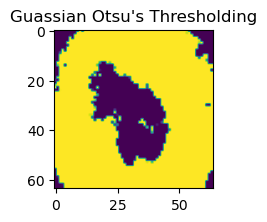

In [16]:
#1
f="E:\\images\\ISIC_0034316.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th3=cv2.resize(th3,(64,64))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

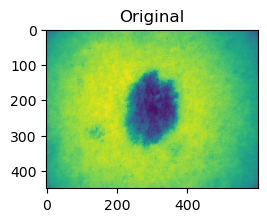

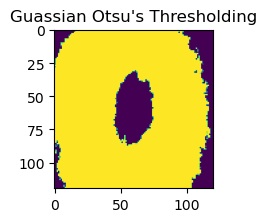

In [17]:
#2
f="E:\\images\\ISIC_0034319.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th3=cv2.resize(th3,(120,120))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

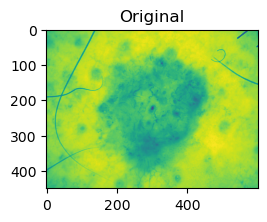

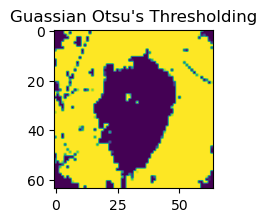

(64, 64)

In [18]:

#3
f="E:\\images\\ISIC_0024332.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

th3=cv2.resize(th3,(64,64))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()
th3.shape

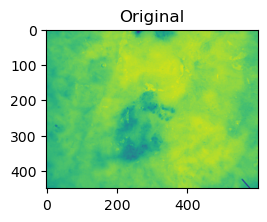

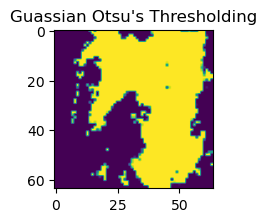

In [19]:
#4
f="E:\\images\\ISIC_0024329.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

th3=cv2.resize(th3,(64,64))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

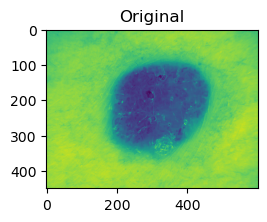

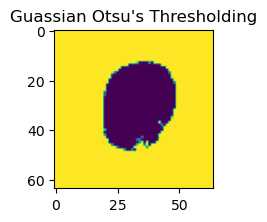

In [20]:
#5
f="E:\\images\\ISIC_0034318.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th3=cv2.resize(th3,(64,64))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

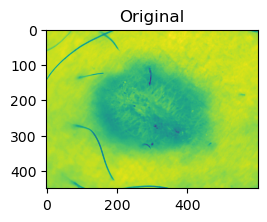

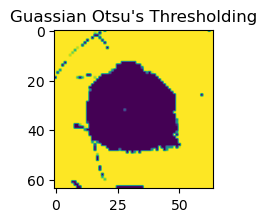

In [21]:
#6
f="E:\\images\\ISIC_0024330.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th3=cv2.resize(th3,(64,64))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

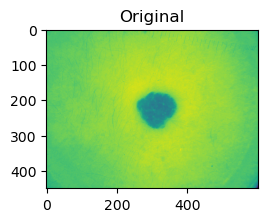

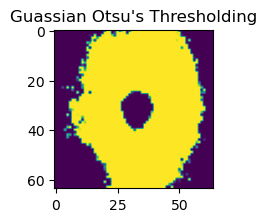

In [22]:
#7
f="E:\\images\\ISIC_0024402.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.show()

plt.figure(figsize=(7, 7))
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th3=cv2.resize(th3,(64,64))
plt.subplot(3, 2, 2)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

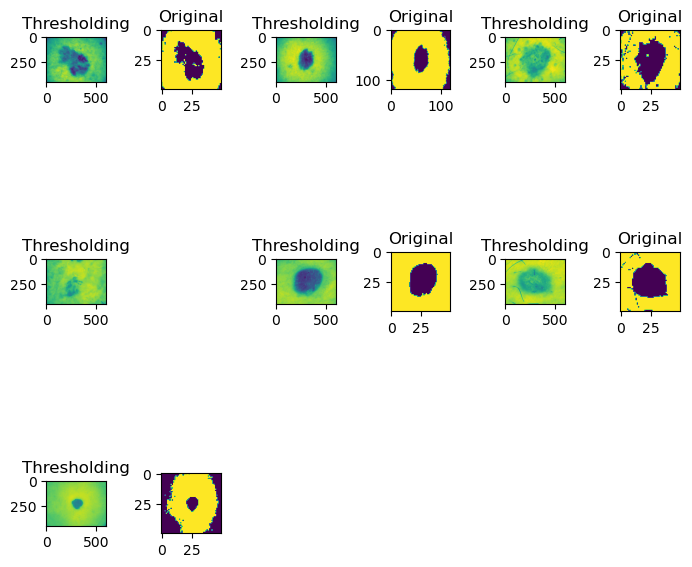

In [126]:
#1
f="E:\\images\\ISIC_0034316.jpg"
image = cv2.imread(f, 0)
plt.figure(figsize=(7, 7))
plt.title("Original")
plt.subplot(3, 6, 1)
plt.tight_layout(h_pad=1)
plt.imshow(image)

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(50,50))
plt.subplot(3, 6, 2)
plt.tight_layout(h_pad=1)
plt.imshow(th3)


#2
f="E:\\images\\ISIC_0034319.jpg"
image = cv2.imread(f, 0)
plt.title("Original")
plt.subplot(3, 6, 3)
plt.tight_layout(h_pad=1)
plt.imshow(image)



blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(120,120))
plt.subplot(3, 6, 4)
plt.tight_layout(h_pad=1)
plt.imshow(th3)


#3
f="E:\\images\\ISIC_0024332.jpg"
image = cv2.imread(f, 0)
plt.title("Original")
plt.subplot(3, 6, 5)
plt.tight_layout(h_pad=1)
plt.imshow(image)

blur = cv2.GaussianBlur(image, (5,5), 0)
_,th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(50,50))
plt.subplot(3, 6, 6)
plt.tight_layout(h_pad=1)
plt.imshow(th3)


#4
f="E:\\images\\ISIC_0024329.jpg"
image = cv2.imread(f, 0)
plt.title("Original")
plt.subplot(3, 6, 7)
plt.tight_layout(h_pad=1)
plt.imshow(image)

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(50,50))
plt.subplot(3, 6, 8)
plt.tight_layout(h_pad=1)
plt.imshow(th3)


#5
f="E:\\images\\ISIC_0034318.jpg"
image = cv2.imread(f, 0)
plt.title("Original")
plt.subplot(3, 6, 9)
plt.tight_layout(h_pad=1)
plt.imshow(image)

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(50,50))
plt.subplot(3, 6, 10)
plt.tight_layout(h_pad=1)
plt.imshow(th3)
#plt.show()

#6
f="E:\\images\\ISIC_0024330.jpg"
image = cv2.imread(f, 0)
plt.title("Original")
plt.subplot(3, 6, 11)
plt.tight_layout(h_pad=1)
plt.imshow(image)

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(50,50))
plt.subplot(3, 6, 12)
plt.tight_layout(h_pad=1)
plt.imshow(th3)


#7
f="E:\\images\\ISIC_0024402.jpg"
image = cv2.imread(f, 0)
plt.title("Original")
plt.subplot(3, 6, 13)
plt.tight_layout(h_pad=1)
plt.imshow(image)

blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Thresholding")
th3=cv2.resize(th3,(50,50))
plt.subplot(3, 6, 14)
plt.tight_layout(h_pad=1)
plt.imshow(th3)

plt.show()